# Constraining line ratios

Some line doublets (e.g. [NII]6548,6583, [OIII]4959,5007) have known line ratios which then should be constrained to inject more information and optimize the unceratinty on the best fit parameters by minimizing the number of free parameters (especially if the SNR is low and if small variations of the ratio could not be measured anyway).

In [1]:
# import base class for the manipulation of a SITELLE spectral cube: HDFCube
from orcs.process import SpectralCube
import pylab as pl
# load spectral cube
cube = SpectralCube('/home/thomas/M31_SN3.merged.cm1.1.0.hdf5')

master.03e73|INFO| Cube is level 3
master.03e73|INFO| shape: (2048, 2064, 840)
master.03e73|INFO| wavenumber calibration: True
master.03e73|INFO| flux calibration: True
master.03e73|INFO| wcs calibration: True


## Fit with no amplitude constraint

=== Fit results ===
lines: ['[NII]6548', 'H3', '[NII]6584'], fmodel: gaussian
iterations: 67, fit time: 8.44e-02 s
Velocity (km/s): [-295.6(1.1) -295.6(1.1) -295.6(1.1)] 
Flux: [4.62(57)e-15 1.410(57)e-14 1.561(57)e-14]
Broadening (km/s): [nan +- nan nan +- nan nan +- nan]

[NII] flux ratio 3.3796131687016837


(14500, 15500)

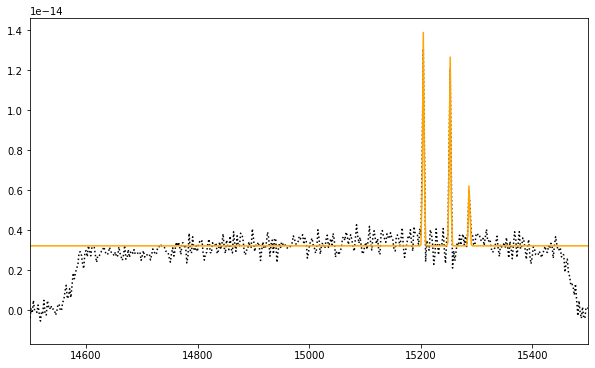

In [2]:
spectrum = cube.get_spectrum(998, 1198, 2)
fit = spectrum.fit(['[NII]6548', 'Halpha', '[NII]6583'],
                   fmodel='gaussian',
                   pos_cov=-350, 
                   pos_def=['1'],
                   fwhm_def='fixed')


print(fit)
print('[NII] flux ratio', fit['flux'][2]/fit['flux'][0])

pl.figure(figsize=(10,6))
spectrum.plot(ls=':', c='black')
fit.get_spectrum().plot(ls='-', c='orange')
pl.xlim(14500, 15500)

## Fit with naive amplitude ratio constraint

Only the amplitude parameter can be constrained but not the flux (flux is a function of fwhm, broadening and amplitude). However, the natural axis of interferometric spectra is in wavenumber so that their fwhm (instrumental line shape) is constant in wavenumber. It means that, in wavelength (which is the axis on which the flux is evaluated when the flux unit are erg/cm2/s/A), for a given amplitude the flux will also depend on the wavelength. i.e. for a given amplitude ratio of 3 between two lines, the flux ratio will be slightly different from 3. 

This problem will be answered next. For the moment we will see how we can constraint the amplitude ratio between two lines. When two lines are covarying in amplitude, the covariance parameter will be multiplicative over the initial guess of the lines amplitude. We can thus set a line to a guessed amplitude of 1 and the other at 3 and their amplitude ratio will always be 3. The covarying parameter which is free will multiply both lines by e.g. 3.2e-17 and the first line will have a final amplitude of 3.2e-17 while the second one will have a final amplitude of 9.6e-17.

=== Fit results ===
lines: ['[NII]6548', 'H3', '[NII]6584'], fmodel: gaussian
iterations: 61, fit time: 7.80e-02 s
Velocity (km/s): [-295.6(1.1) -295.6(1.1) -295.6(1.1)] 
Flux: [5.10(18)e-15 1.410(57)e-14 1.546(54)e-14]
Broadening (km/s): [nan +- nan nan +- nan nan +- nan]

[NII] amplitude ratio 3.0
[NII] flux ratio 3.0325248184327562


(14500, 15500)

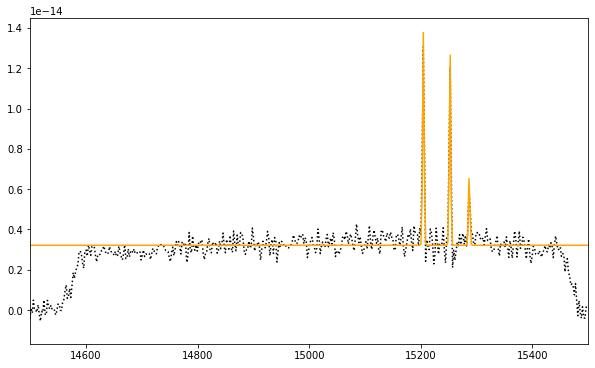

In [3]:
spectrum = cube.get_spectrum(998, 1198, 2)
fit = spectrum.fit(['[NII]6548', 'Halpha', '[NII]6583'],
                   fmodel='gaussian',
                   pos_cov=-350, 
                   pos_def=['1'],
                   fwhm_def='fixed',
                   amp_def=['1', '2', '1'],
                   amp_guess=[1, 1, 3])


print(fit)

print('[NII] amplitude ratio', fit['lines_params'][2,1]/fit['lines_params'][0,1])
print('[NII] flux ratio', fit['flux'][2]/fit['flux'][0])

pl.figure(figsize=(10,6))
spectrum.plot(ls=':', c='black')
fit.get_spectrum().plot(ls='-', c='orange')
pl.xlim(14500, 15500)

## Fit with a flux ratio constraint

In the preceding example you can see that the amplitude ratio is 3 but the flux ratio (which is generally the parameter we want to constraint) is not exactly 3. To compute the amplitude ratio you must set to obtain a flux ratio of 3 you can use the method ``cube.get_amp_ratio_from_flux_ratio`` and use its output to set the correct amplitude ratio.

In [4]:
amp_ratio = cube.get_amp_ratio_from_flux_ratio('[NII]6583', '[NII]6548', 3)
amp_ratio

2.967824020860382

=== Fit results ===
lines: ['[NII]6548', 'H3', '[NII]6584'], fmodel: gaussian
iterations: 61, fit time: 7.91e-02 s
Velocity (km/s): [-295.6(1.1) -295.6(1.1) -295.6(1.1)] 
Flux: [5.15(18)e-15 1.410(57)e-14 1.544(54)e-14]
Broadening (km/s): [nan +- nan nan +- nan nan +- nan]

[NII] amplitude ratio 2.967824020860382
[NII] flux ratio 3.0


(14500, 15500)

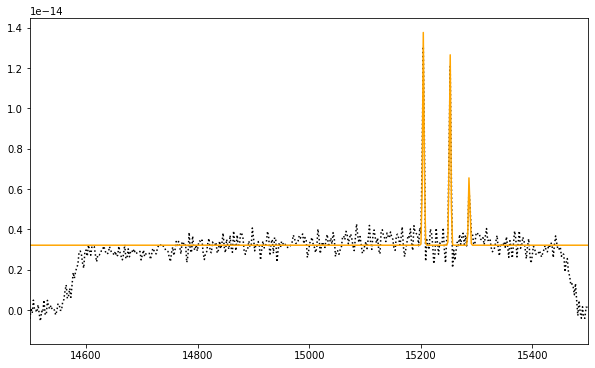

In [5]:
spectrum = cube.get_spectrum(998, 1198, 2)
fit = spectrum.fit(['[NII]6548', 'Halpha', '[NII]6583'],
                   fmodel='gaussian',
                   pos_cov=-350, 
                   pos_def=['1'],
                   fwhm_def='fixed',
                   amp_def=['1', '2', '1'],
                   amp_guess=[1, 1, amp_ratio])


print(fit)

print('[NII] amplitude ratio', fit['lines_params'][2,1]/fit['lines_params'][0,1])
print('[NII] flux ratio', fit['flux'][2]/fit['flux'][0])

pl.figure(figsize=(10,6))
spectrum.plot(ls=':', c='black')
fit.get_spectrum().plot(ls='-', c='orange')
pl.xlim(14500, 15500)